### https://www.kaggle.com/shwetagoyal4/analyzing-time-series-data

#### https://www.kaggle.com/yashvi/time-series-analysis-and-forecasting-reliance

#### https://www.kaggle.com/parulpandey/getting-started-with-time-series-using-pandas

#### https://www.kaggle.com/parulpandey/useful-python-libraries-for-data-science

#### https://www.kaggle.com/karthikbaskar/bank-loan-modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### so that u dont have warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_excel('E:/Data_Analytics_for_finance/Bank/Bank_Personal_Loan_Modelling.xlsx',1)

In [3]:
df.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

### Exploratory Data Analysis

In [4]:
df.shape

(5000, 14)

In [5]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### ID and Zipcode might be removed as they may not be useful for our analysis

In [6]:
df.drop(['ID','ZIP Code'],axis=1,inplace=True)

In [7]:
df.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [8]:
import plotly.express as px

In [9]:
fig = px.box(df, y=['Age','Experience','Income','Family','Education'])
fig.show()

#### check skewness in your data

In [17]:
df.skew()

Age                  -0.029341
Experience           -0.026325
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [10]:
df.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

#### now visualise Skewness by distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000CB8630FC88>,
      dtype=object)

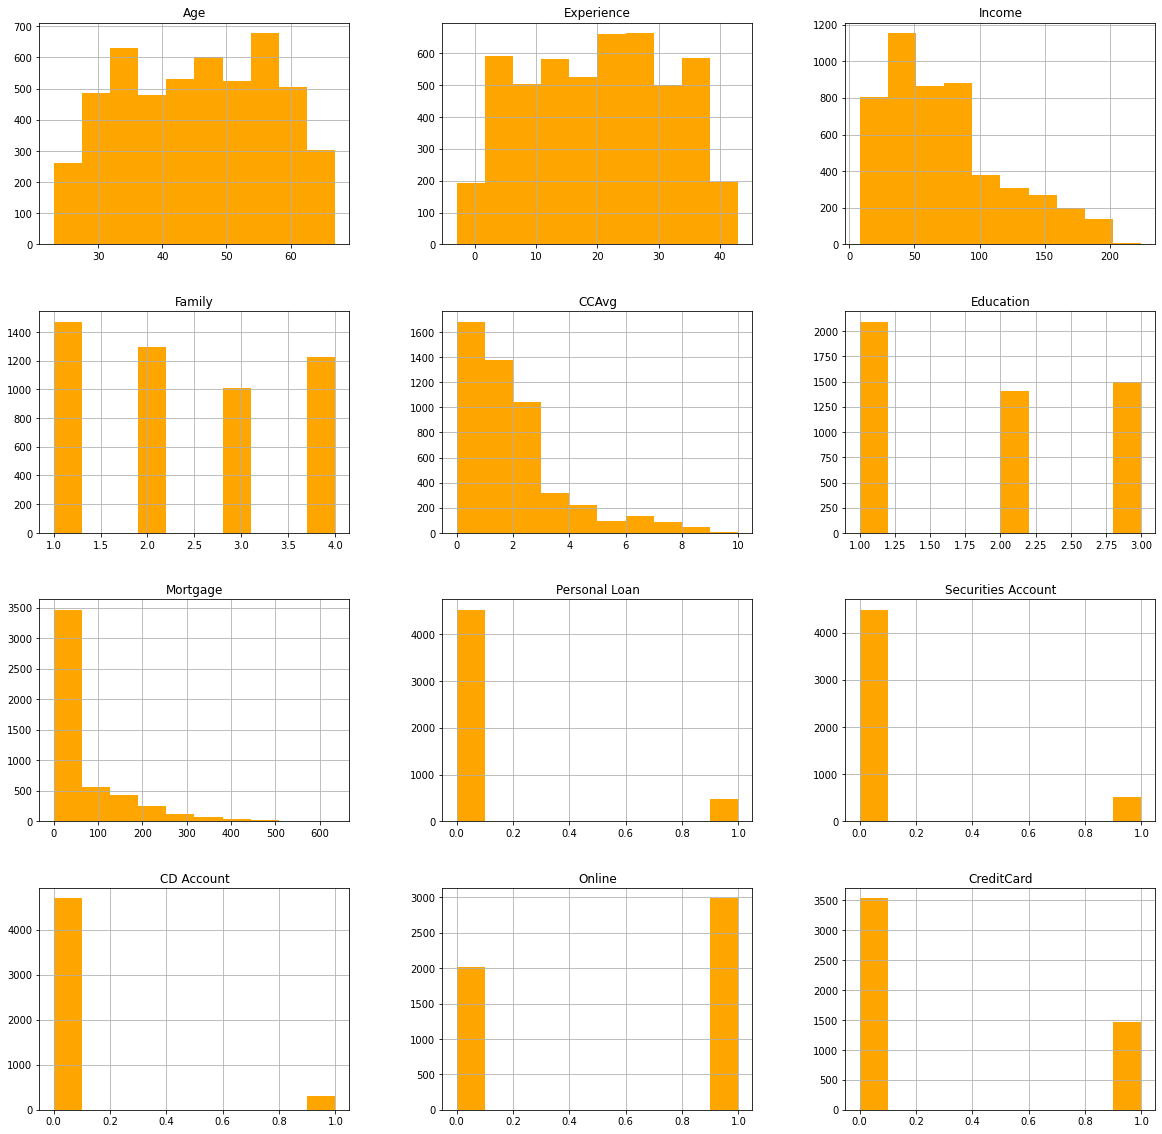

In [47]:
df.hist(color='Orange',figsize=(20,20))

#### INFERENCE from Histogram

    Age & Experience are to an extent equally distributed
    Income & Credit card spending are skewed to the left
    We have more Undergraduates than Graduate and Advanced & Professional
    60% of customers have enabled online banking and went digital


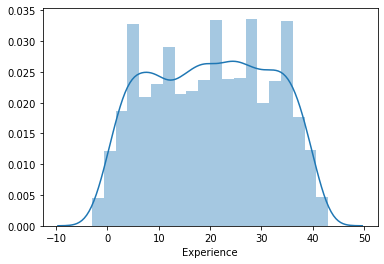

In [11]:
sns.distplot(df['Experience'])

In [52]:
df['Experience'].mean()

20.1046

In [58]:
df.shape

(5000, 12)

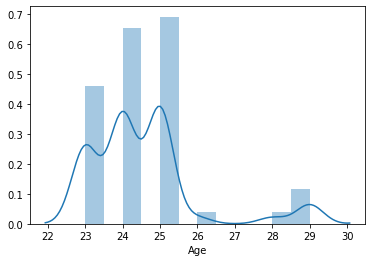

In [12]:
Negative_exp=df[df['Experience']< 0]
sns.distplot(Negative_exp['Age'],kde=True,label="Distribution of Age having negative values")

In [56]:
Negative_exp['Experience'].mean()

-1.4423076923076923

In [13]:
Negative_exp.size

624

##### There are 52 records which has negative values for Experience, approx 1.04% among age group between 22 to 30

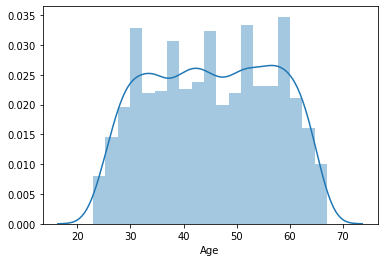

In [54]:
sns.distplot(df['Age'])

In [61]:
df.shape[0]

5000

In [72]:
print('There are {} records which has negative values for Experience, approx {} % among age group between 22 to 30'.format(Negative_values_in_exp.size ,((Negative_values_in_exp.size/df.size)*100)))

There are 624 records which has negative values for Experience, approx 1.04 % among age group between 22 to 30


##### I am using numpy where function to change the negative values to mean value derived from data with the same age group 

In [20]:
data=df.copy()

In [120]:
data[data['Experience']<0]

Age  Experience  Income  Family     CCAvg  Education  Mortgage  \
89     25          -1     113       4  2.300000          3         0   
226    24          -1      39       2  1.700000          2         0   
315    24          -2      51       3  0.300000          3         0   
451    28          -2      48       2  1.750000          3        89   
524    24          -1      75       4  0.200000          1         0   
536    25          -1      43       3  2.400000          2       176   
540    25          -1     109       4  2.300000          3       314   
576    25          -1      48       3  0.300000          3         0   
583    24          -1      38       2  1.700000          2         0   
597    24          -2     125       2  7.200000          1         0   
649    25          -1      82       4  2.100000          3         0   
670    23          -1      61       4  2.600000          1       239   
686    24          -1      38       4  0.600000          2         0   
793    24          -2     150       2  2.000000          1         0   
889    24          -2      82       2  1.600000          3         0   
909    23          -1     149       1  6.333333          1       305   
1173   24          -1      35       2  1.700000          2         0   
1428   25          -1      21       4  0.400000          1        90   
1522   25          -1     101       4  2.300000          3       256   
1905   25          -1     112       2  2.000000          1       241   
2102   25          -1      81       2  1.600000          3         0   
2430   23          -1      73       4  2.600000          1         0   
2466   24          -2      80       2  1.600000          3         0   
2545   25          -1      39       3  2.400000          2         0   
2618   23          -3      55       3  2.400000          2       145   
2717   23          -2      45       4  0.600000          2         0   
2848   24          -1      78       2  1.800000          2         0   
2876   24          -2      80       2  1.600000          3       238   
2962   23          -2      81       2  1.800000          2         0   
2980   25          -1      53       3  2.400000          2         0   
3076   29          -1      62       2  1.750000          3         0   
3130   23          -2      82       2  1.800000          2         0   
3157   23          -1      13       4  1.000000          1        84   
3279   26          -1      44       1  2.000000          2         0   
3284   25          -1     101       4  2.100000          3         0   
3292   25          -1      13       4  0.400000          1         0   
3394   25          -1     113       4  2.100000          3         0   
3425   23          -1      12       4  1.000000          1        90   
3626   24          -3      28       4  1.000000          3         0   
3796   24          -2      50       3  2.400000          2         0   
3824   23          -1      12       4  1.000000          1         0   
3887   24          -2     118       2  7.200000          1         0   
3946   25          -1      40       3  2.400000          2         0   
4015   25          -1     139       2  2.000000          1         0   
4088   29          -1      71       2  1.750000          3         0   
4116   24          -2     135       2  7.200000          1         0   
4285   23          -3     149       2  7.200000          1         0   
4411   23          -2      75       2  1.800000          2         0   
4481   25          -2      35       4  1.000000          3         0   
4514   24          -3      41       4  1.000000          3         0   
4582   25          -1      69       3  0.300000          3         0   
4957   29          -1      50       2  1.750000          3         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
89                0                   0           0       0           1  
226               0                   0  

In [86]:
data['Experience'].mean()

20.1046

In [21]:
data['Experience']=np.where(data['Experience']<0,data['Experience'].mean(),data['Experience'])

In [16]:
print("After updating the negative records we get the mean value of exp to be:{}".format(data['Experience'].mean()))

After updating the negative records we get the mean value of exp to be:20.32868784000002


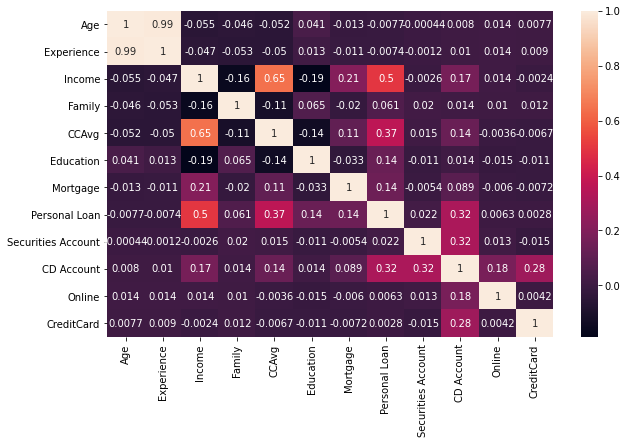

In [98]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

#### We could see that Age & Experience are very strongly correlated,
#### Hence it is fine for us to go with Age and drop Experience to avoid multi-colinearity issue.

In [17]:
data=data.drop(['Experience'],axis=1)

In [123]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [149]:
data['Education'].unique()

array([1, 2, 3], dtype=int64)

In [22]:
def mark(x):
    if x==1:
        return "Undergrad"
    elif x==2:
        return "Graduate"
    else:
        return "Advanced/Professional"

In [23]:
data['Edu_mark']=data['Education'].apply(mark)

In [33]:
EDU_dis=data.groupby('Edu_mark')["Age"].count()


In [32]:
fig = px.pie(data, values=EDU_dis, names=EDU_dis.index,title='Pie chart')
fig.show()

#### Inference :We could see that We have more Undergraduates 41.92% than graduates(28.06%) & Advanced Professional(30.02%)

In [25]:
data.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25         1.0      49       4    1.6          1         0              0   
1   45        19.0      34       3    1.5          1         0              0   
2   39        15.0      11       1    1.0          1         0              0   
3   35         9.0     100       1    2.7          2         0              0   
4   35         8.0      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard   Edu_mark  
0                   1           0       0           0  Undergrad  
1                   1           0       0           0  Undergrad  
2                   0           0       0           0  Undergrad  
3                   0           0       0           0   Graduate  
4                   0           0       0           1   Graduate

### Lets Explore the account holder's distribution

In [26]:
def Security_CD(row):
    if (row['Securities Account']==1) & (row['CD Account']==1):
        return"Holds Securities & deposit"
    elif(row['Securities Account']==0) & (row['CD Account']==0):
        return"Does not hold any securities or deposit"
    elif(row['Securities Account']==1) & (row['CD Account']==0):
        return "Holds only Securities Account"
    elif(row['Securities Account']==0) & (row['CD Account']==1):
        return"Holds only deposit" 

In [27]:
df['Account_Holder_Category']=data.apply(Security_CD,axis=1)

In [34]:
values=df['Account_Holder_Category'].value_counts()

In [35]:
fig = px.pie(data, values=values, names=values.index,title='Pie chart')
fig.show()

###### We could see that alomst 87% of customers do not hold any securities or deposit, and 3 % hold both securities as well as deposit. It will be good if we encourage those 87% to open any of these account as it will improve the assests of the bank

In [40]:
px.box(df,x='Education',y='Income',facet_col='Personal Loan')

#### From the above plot we could say that Income of customers who availed personal loan are alomst same irrescpective of their Education

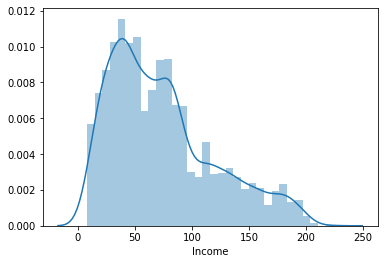

In [186]:
sns.distplot(data['Income'])

Text(0.5, 1.0, 'Income Distribution')

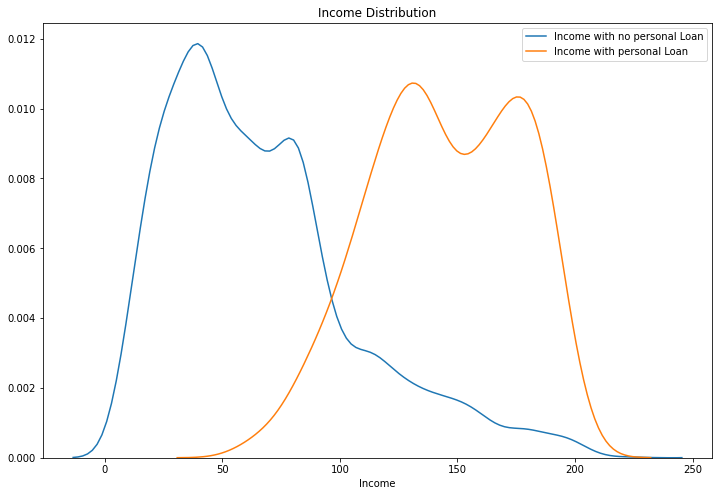

In [165]:
plt.figure(figsize=(12,8))
sns.distplot(data[data['Personal Loan']==0]['Income'],hist=False,label="Income with no personal Loan")
sns.distplot(data[data['Personal Loan']==1]['Income'],hist=False,label="Income with personal Loan")
plt.legend()
plt.title("Income Distribution")

##### Customers Who have availed personal loan seem to have higher income than those who do not have personal loan¶

### automate above stuffs

In [30]:
def plot(col1,col2,label1,label2,title):
    plt.figure(figsize=(12,8))
    sns.distplot(data[data[col2]==0][col1],hist=False,label=label1)
    sns.distplot(data[data[col2]==1][col1],hist=False,label=label2)
    plt.legend()
    plt.title(title)

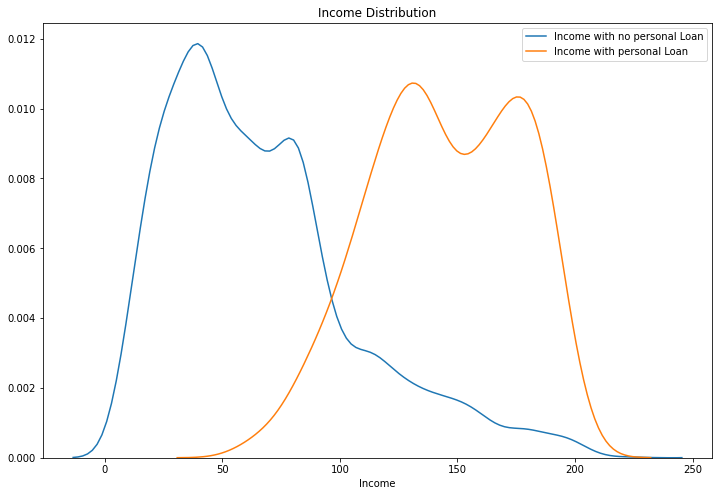

In [31]:
plot('Income','Personal Loan',"Income with no personal Loan","Income with personal Loan",'Income Distribution')

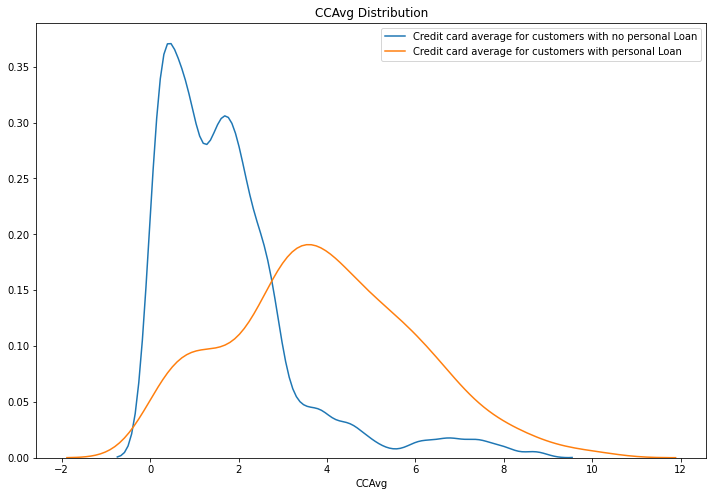

In [171]:
plot('CCAvg','Personal Loan',"Credit card average for customers with no personal Loan","Credit card average for customers with personal Loan",'CCAvg Distribution')

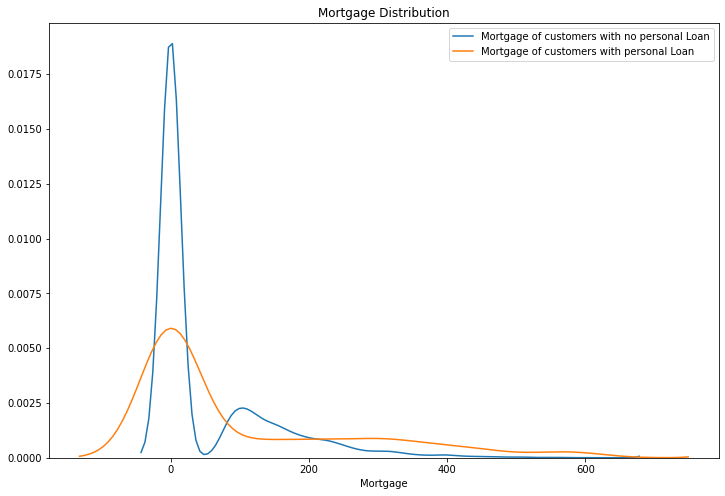

In [172]:
plot('Mortgage','Personal Loan',"Mortgage of customers with no personal Loan","Mortgage of customers with personal Loan",'Mortgage Distribution')

#### People with high mortgage value, i.e more than 400K have availed personal Loan

In [173]:
col_names=['Securities Account','Online','CreditCard']

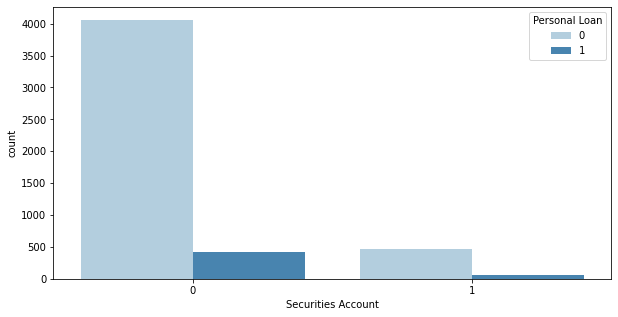

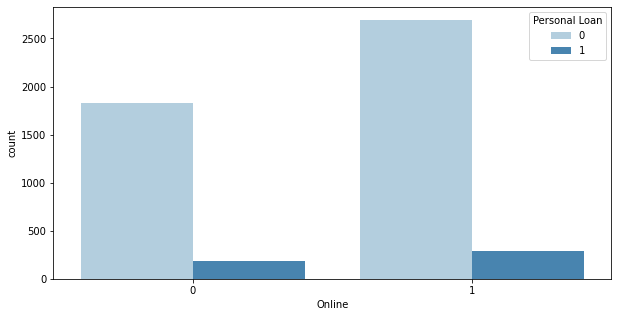

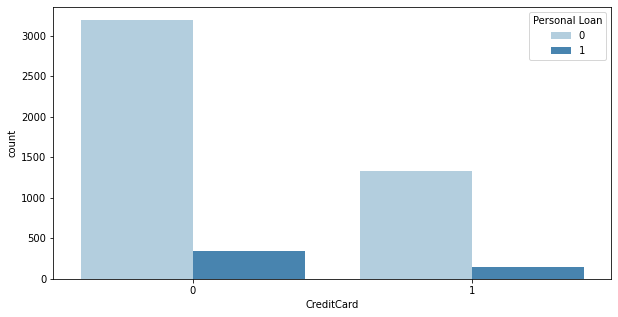

In [175]:
for i in col_names:
    plt.figure(figsize=(10,5))
    sns.countplot(x=i,hue='Personal Loan',palette="Blues", data=df)

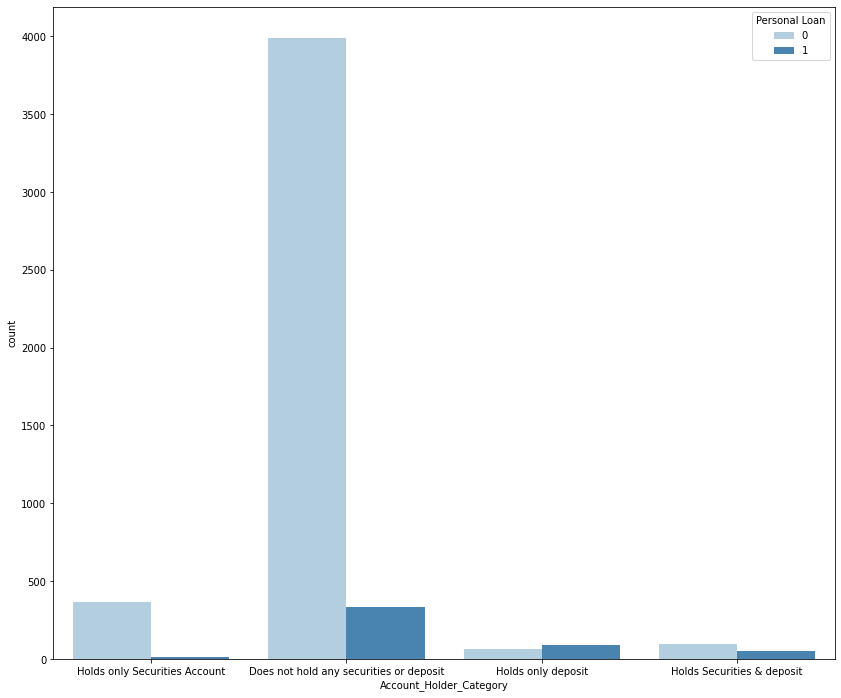

In [176]:
plt.figure(figsize=(14,12))
sns.countplot(df['Account_Holder_Category'],hue=df['Personal Loan'],palette='Blues')
plt.show();

#### From the above graph we could infer that , customers who hold deposit account & customers who do not hold either a securities account or deposit account have aviled personal loan